# 0.) Import and Clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/Users/sandinatatu/Desktop/bank-additional-full (1).csv", sep=";")

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [6]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [7]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

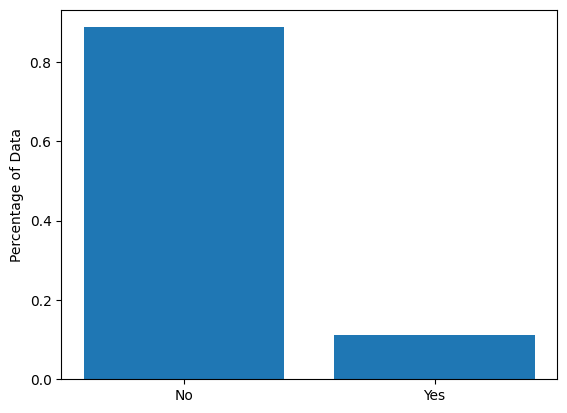

In [8]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [10]:
###############
###TRANSFORM###
###############

#Since the data is imbalanced, I will be using SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [11]:
dtree1 = DecisionTreeClassifier(max_depth = 3)
dtree1.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

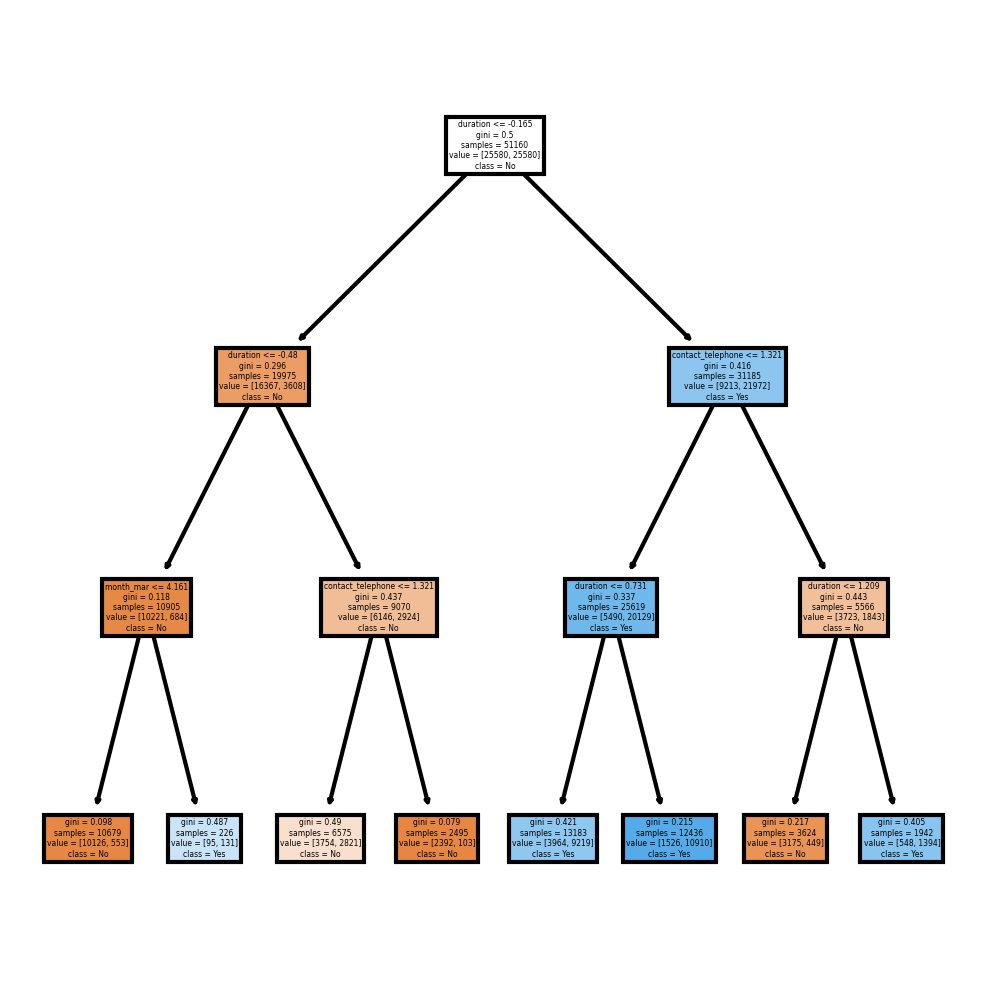

In [12]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree1, filled = True, feature_names = X.columns.tolist(), class_names=["No","Yes"])
plt.show()

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [13]:
y_pred = dtree1.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

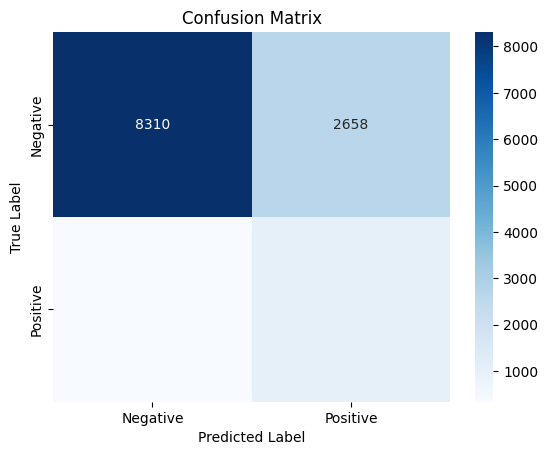

In [14]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [15]:
dtree2 = DecisionTreeClassifier(max_depth = 3)

In [16]:
bagging = BaggingClassifier(estimator=dtree2, n_estimators=100, max_samples=.5, max_features =1.)

In [17]:
bagging.fit(X_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=0.5, n_estimators=100)

In [18]:
y_pred = bagging.predict(X_test)

In [19]:
cm_raw2 = confusion_matrix(y_test, y_pred)

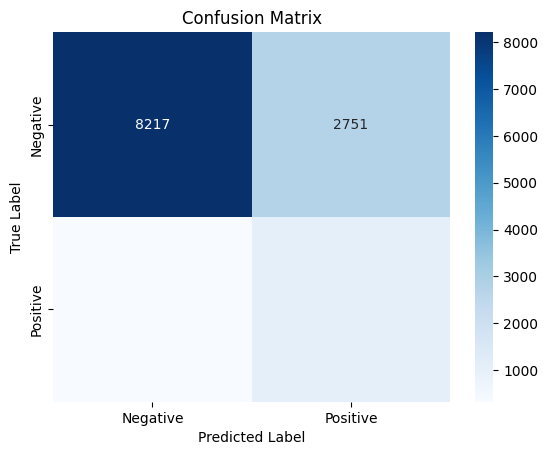

In [20]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
dtree3 = DecisionTreeClassifier(max_depth = 3)

In [23]:
myboost = AdaBoostClassifier(estimator = dtree3, n_estimators = 100, learning_rate = .1)
myboost.fit(X_scaled, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=100)

In [24]:
y_pred=myboost.predict(X_test)

In [25]:
cm_raw3 = confusion_matrix(y_test, y_pred)

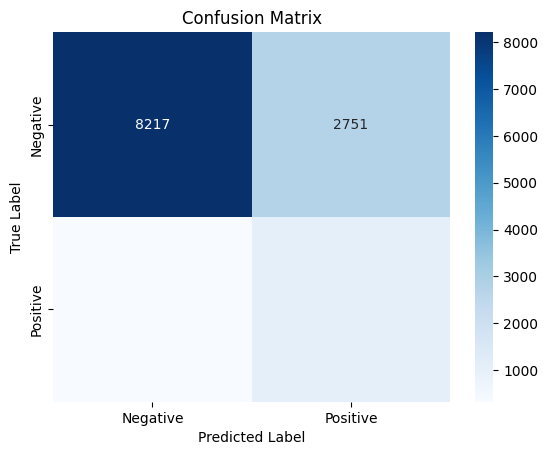

In [26]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [27]:
pip install mlens

Note: you may need to restart the kernel to use updated packages.


In [28]:
dtree4 = DecisionTreeClassifier(max_depth = 5)
dtree4.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#from mlens.ensemble import SuperLearner

In [30]:
predictions=[list(dtree1.predict(X_scaled)), 
                  list(myboost.predict(X_scaled)), 
                  list(bagging.predict(X_scaled)),
                  list(dtree4.predict(X_scaled))]

In [31]:
predictions=np.array(predictions).transpose()

In [32]:
sl = LogisticRegression()

In [33]:
sl.fit(predictions, y_train)

LogisticRegression()

In [34]:
print(f"The SuperLearner coefficients are {sl.coef_}")

The SuperLearner coefficients are [[-0.00771292  4.68179054  0.69712536  1.39165376]]


It seems that the SuperLearner gave the highest weight to the AdaBoostClassifier model, meaning that these model is the most accuracte for our dataset. The second most accurate is the decision tree classifier with max_depth 5, followed by the decision tree classifier with max_depth 3 and the bagging model.

In [37]:
tpred = [
    list(dtree1.predict(X_test)), 
    list(myboost.predict(X_test)), 
    list(bagging.predict(X_test)),
    list(dtree4.predict(X_test))
]


tpred = np.array(tpred).transpose()


y_pred = sl.predict(tpred)


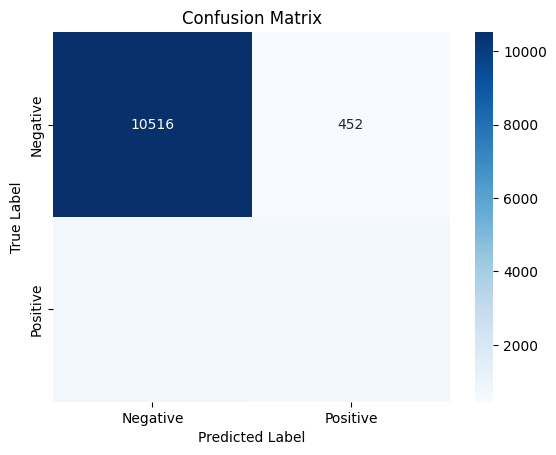

In [38]:
cm_raw4 = confusion_matrix(y_test, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw4, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()